# Programming Project #1: Hybrid Images

## CS445: Computational Photography - Spring 2020

### Part I: Hybrid Images

In [1]:
!pip install opencv-python
!pip install opencv-contrib-python
!pip install pillow
!pip install matplotlib
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

import utils

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
im1_file = './nutmeg.jpg'
im2_file = './DerekPicture.jpg'

im1 = cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


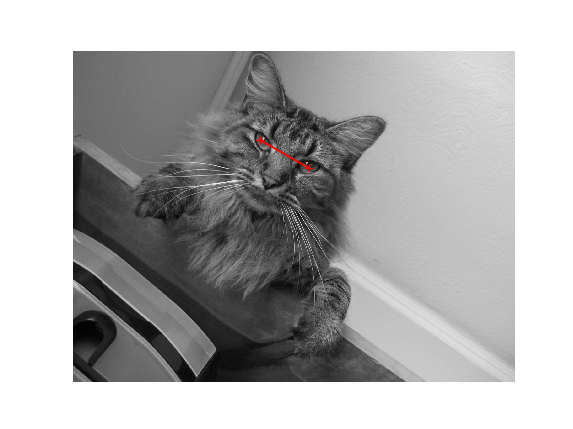

In [4]:
pts_im1 = utils.prompt_eye_selection(im1)

<IPython.core.display.Javascript object>


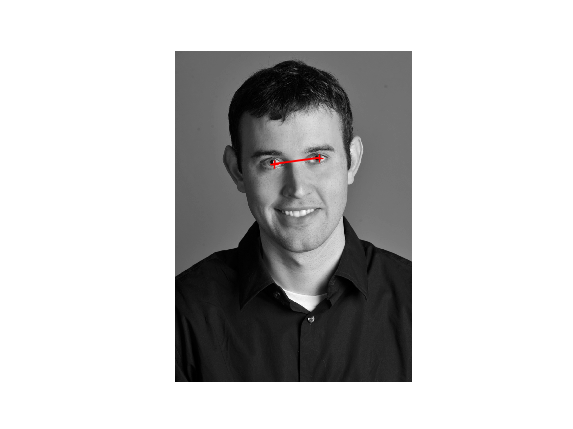

In [6]:
pts_im2 = utils.prompt_eye_selection(im2)

In [7]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)

In [8]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


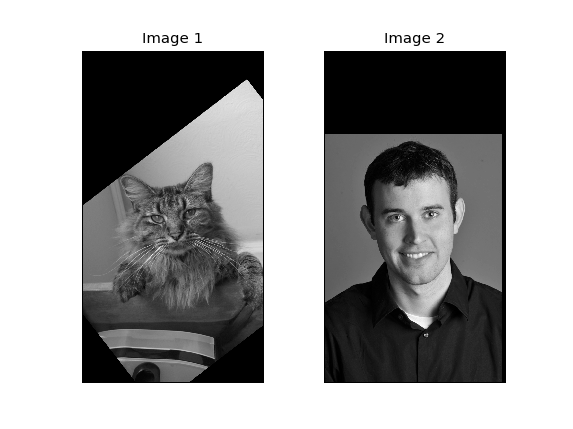

<IPython.core.display.Javascript object>


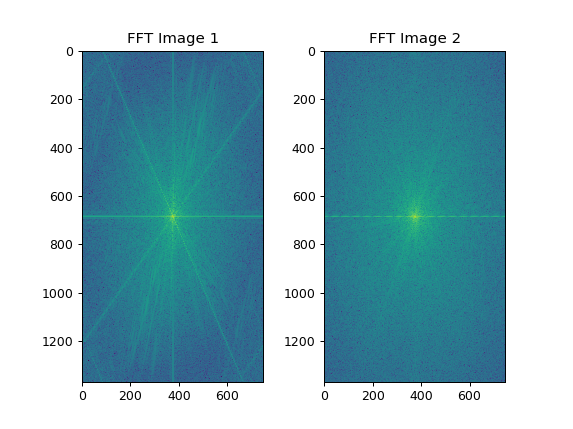

In [9]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

fig, axes = plt.subplots(1,2)
plt.subplot(121)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
plt.title("FFT Image 1")
plt.show()

plt.subplot(122)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
plt.title("FFT Image 2")
plt.show()


In [21]:
def hybridImage(im1, im2, cutoff_low, cutoff_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        cutoff_low: standard deviation for the low-pass filter
        cutoff_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''
    high_pass = im1 - signal.convolve2d(im1, utils.gaussian_kernel(cutoff_high, 3 * cutoff_high), mode='same', boundary='symm')
    low_pass = signal.convolve2d(im2, utils.gaussian_kernel(cutoff_low, 3 * cutoff_low), mode='same', boundary='symm')
        
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(low_pass,cmap='gray')
    axes[0].set_title('Low Pass Image 2'), axes[0].set_xticks([]), axes[0].set_yticks([])
    axes[1].imshow(high_pass,cmap='gray')
    axes[1].set_title('High Pass Image 1'), axes[1].set_xticks([]), axes[1].set_yticks([]);
#     high_passed = im1 - signal.convolve2d(im1, utils.gaussian_kernel(cutoff_high,3*cutoff_high),boundary='symm', mode='same')
#     low_passed = signal.convolve2d(im2, utils.gaussian_kernel(cutoff_low,3*cutoff_low),boundary='symm', mode='same')
    
#     fig, axes = plt.subplots(1, 2)
#     axes[0].imshow(high_passed,cmap='gray')
#     axes[0].set_title('High passed'), axes[0].set_xticks([]), axes[0].set_yticks([])
#     axes[1].imshow(low_passed,cmap='gray')
#     axes[1].set_title('Low passed'), axes[1].set_xticks([]), axes[1].set_yticks([]);
    
    #Display Filtered FFT 
#     fft_high = np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass))))
#     fft_low = np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass))))

#     fig, axes = plt.subplots(1, 2)
#     axes[0].imshow(fft_high)
#     axes[0].set_title('FFT High passed'), axes[0].set_xticks([]), axes[0].set_yticks([])
#     axes[1].imshow(fft_low)
#     axes[1].set_title('FFT Low passed'), axes[1].set_xticks([]), axes[1].set_yticks([]);

    fig, axes = plt.subplots(1,2)
    plt.subplot(121)
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass)))))
    plt.title("FFT Low Pass")
    plt.show()

    plt.subplot(122)
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass)))))
    plt.title("FFT High Pass")
    plt.show()

    return high_pass+low_pass

<IPython.core.display.Javascript object>


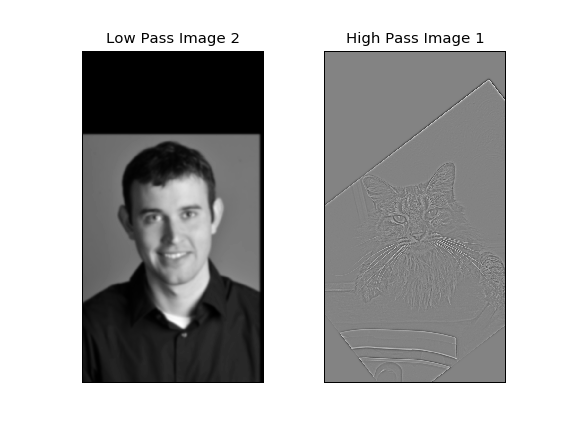

<IPython.core.display.Javascript object>


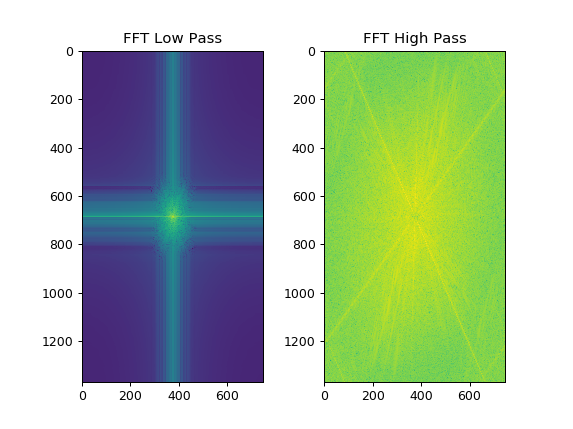

In [22]:
arbitrary_value = 4  # you should choose meaningful values; you might want to set to a fraction of image size
cutoff_low = arbitrary_value
cutoff_high = arbitrary_value

im_hybrid = hybridImage(im1, im2, cutoff_low, cutoff_high)

<IPython.core.display.Javascript object>


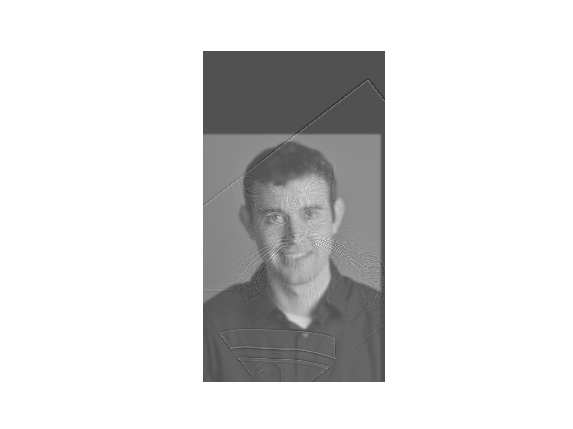

<IPython.core.display.Javascript object>


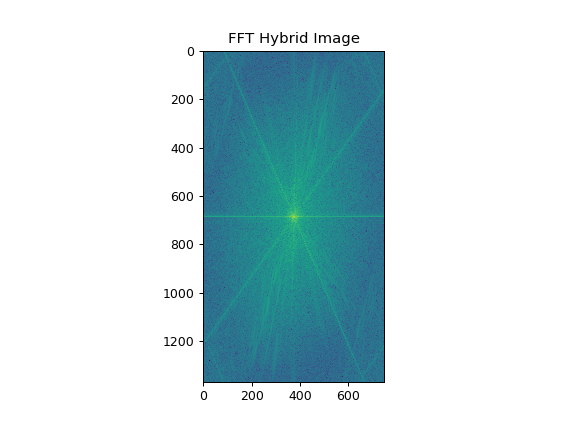

In [25]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

fig, axes = plt.subplots(1,1)
fft = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid))))
plt.imshow(fft)
plt.title("FFT Hybrid Image")
plt.show()


### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

#### Color enhancement 

#### Color shift